# P2 Investigate a Dataset: Project
In this prokect I used Titanic Data to expolore what factros made people more likely to survive.

Dataset: Titanic Data <br>
Primary Question: What factors made people more likely to survive.

<b>Importing nessesary packages</b>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<b>Read Titanic Data File</b>

In [2]:
path = "https://raw.githubusercontent.com/kunski/udacity_p2_project/master/titanic_data.csv"
titanic = pd.read_csv(path)

## Summary Statistics

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For my convenience, I would like to set Pandas Seriese index same as PassenderID, using NumPy array;

In [4]:
index = np.array(titanic["PassengerId"])
titanic.index = index

In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.shape

(891, 12)

Now I get index same as passengerID of titanic data. <br>

It is seems like that the titanic data has total 891 passengers as row and 12 variables.

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here is the summry of the data, and one of the things I noticed that it is looks like that roughly 60% of passengers out of 891 did not survived as mean of Survived is 0.38, and age are range for 0.42!! (must be a new born baby) to 80 years old.
<br><br>
Just out of my curiosity, I want to see if this youngest one and oldest one survived.

In [8]:
youngest = titanic["Age"].argmin()
titanic.loc[youngest]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 804, dtype: object

In [9]:
oldest = titanic["Age"].argmax()
titanic.loc[oldest]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 631, dtype: object

It is looks like youngest boy named Thomas, and oldest gentleman named Barkwork both survived at Titanic crush.
It is interesting that both are totally different room class but the same outcome.

Survived
0    549
1    342
Name: Survived, dtype: int64
Populating the interactive namespace from numpy and matplotlib


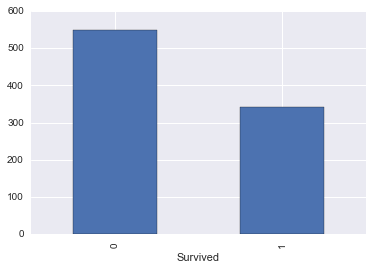

In [10]:
survived_group = titanic.groupby("Survived")
suvivor_count = survived_group["Survived"].count()

print suvivor_count
%pylab inline
suvivor_count.plot.bar()

When I counting total number of suvivors, it is seems like that there are only 342 passengers are survived and 549 passengers did not make it out of 891 passengers.  

## Univariabe Analysis
In this section I try see each variable and how its distributed,

<b>Class Distribution</b>

(Pclass
 1    216
 2    184
 3    491
 Name: Pclass, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7e7d690>)

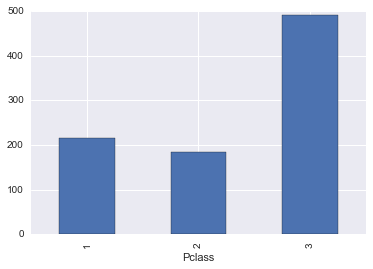

In [11]:
#But first, I made function that counts and plot each group distribution;
def group_dist(df, v):
    group = df.groupby(v)
    count = group[v].count()
    return count, count.plot.bar()

group_dist(titanic, "Pclass")

There are total 3 classes in the data set, and most common class is Class3 with 491 passengers, and least one was Class2 with 184 passengers.

<b>Sex</b>

(Sex
 female    314
 male      577
 Name: Sex, dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x80e22b0>)

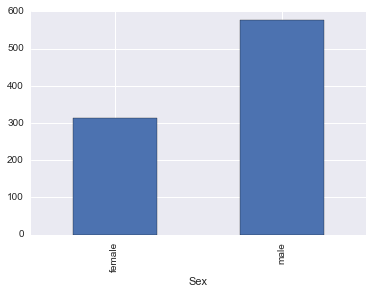

In [12]:
group_dist(titanic, "Sex")

There were more male passengers with 577, and 314 female passengers

<b>Age</b>

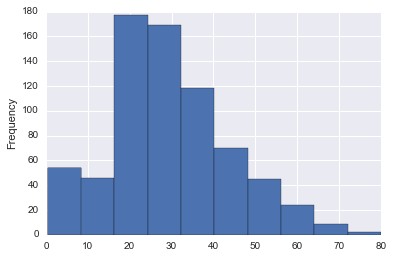

In [13]:
titanic["Age"].plot.hist()

Age was distributed skewd to the right, and most common age was around 20s and 30s in Titanic

<b>Number of Siblings/Spouses Aboard</b>

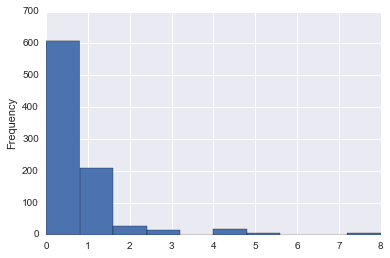

In [14]:
titanic["SibSp"].plot.hist()

Number of siblings and spouses are mostly with 0 and 1, very few at more than 3 siblings or spouses.

<b>Number of Parents/Children Aboard</b>

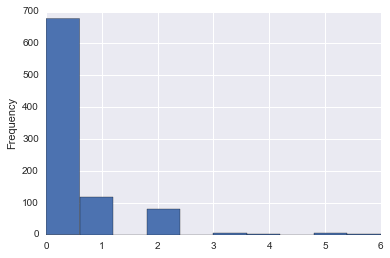

In [15]:
titanic["Parch"].plot.hist()

Number of Parents/Children looks similar as well most common in 0 and 1 Parents/Children

<b>Fares</b>

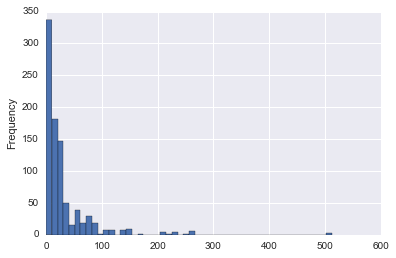

In [16]:
titanic["Fare"].plot.hist(bins =50)

The distribution of fare loos interesting that most of fare range from 0 to  100, there are few people who pays over 100 and over 500!

<b>Embarked

(Embarked
 C    168
 Q     77
 S    644
 Name: Embarked, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x87c58d0>)

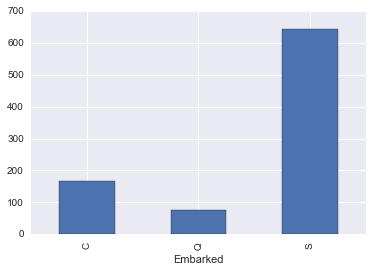

In [17]:
group_dist(titanic, "Embarked")

For place they embarked, it is looks like that passenger from S is largest with 644, and passenger fomr Q is smalled with 77.

## Bivariate Analysis

Now I would like to see the relationship of each factors with comparison of Survivied

<b>Correlation with Survived</b>

In [18]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    return (std_x * std_y).mean()

Survived = titanic["Survived"]
Pclass = titanic["Pclass"]
Age = titanic["Age"]
SibSp = titanic["SibSp"]
Parch = titanic["Parch"]
Fare = titanic["Fare"]

print "Plass: ", correlation(Survived, Pclass)
print "Age: ", correlation(Survived, Age)
print "SibSp: ", correlation(Survived, SibSp)
print "Parch: ", correlation(Survived, Parch)
print "Fare: ", correlation(Survived, Fare)

Plass:  -0.338481035961
Age:  -0.0779826784139
SibSp:  -0.0353224988857
Parch:  0.0816294070835
Fare:  0.257306522385


It is look slike class, age, and number of siblings/spouse negatievly correlated with survived variable.
Implicitly, better class passenger more likely to survived, older passenger more likely to survived, and people with less siblings and spuses more likely to survived.
<br><br>
Number of parents/children and fares looks positibely correlated with survival, meaning that people with more parents and children is more likely to survived, and people who paying more like to survived as well.
<br><br>
However, the strenght of correlation varies across the factors.
It is looks like Class and Fare are more likely yo survived (I thought this 2 variable is only correlated each other as well, better class (class1) is more expensive,)

In [19]:
survived_group = titanic.groupby("Survived")
survived_group.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


When I look at the above average of each factors grouped by survived or not, it can be expected by the previous correlationas well.

<b>The Survival rate<b>

From following, I use term called "the survival rate", which I calculated from the average of Survived in each groups. Because variable survival range from 0 to 1, 1 as survived, the average of survival is equal to the probabilty of one's survival in each groups, and it's very easy to compare the likellihood in certain groups.

<b>Sex and Survival</b>

In [20]:
sex_group = titanic.groupby("Sex")
print "Count by", sex_group["Sex"].count()
print ""
print "Survived by",sex_group["Survived"].sum()

Count by Sex
female    314
male      577
Name: Sex, dtype: int64

Survived by Sex
female    233
male      109
Name: Survived, dtype: int64


It si looks like that although there are many male passenger on board, ther are more female passengers survived after the accident.
Now taking average of suvived by sex group I can compute their survival rete.

Survival Rate by Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate by Sex')


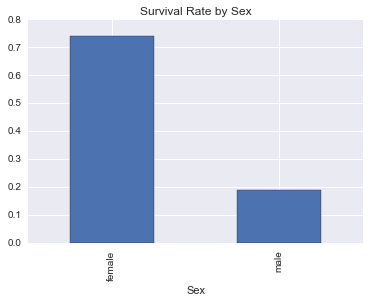

In [21]:
print "Survival Rate by",sex_group["Survived"].mean()
print sex_group["Survived"].mean().plot.bar(), plt.title("Survival Rate by Sex")

Surprisingly, more than 70% of female passenger were survived and almost only 20% of male passenger did not make it.

<b>Class and Survival<b>

In [22]:
# I made function called survival rate to comple same thing as well as previous one,
def survival_rate(df, v, survived):
    group = df.groupby(v)
    count = group[v].count()
    survival_rate = group[survived].mean()
    print "Survival Rate by", survival_rate
    print survival_rate.plot.bar(), plt.title("Survival Rate By "+ v)

Survival Rate by Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By Pclass')


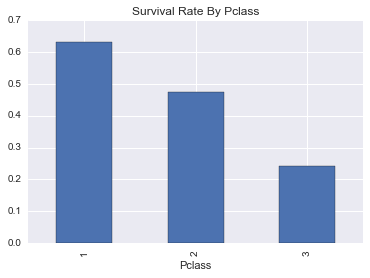

In [23]:
survival_rate(titanic, "Pclass", "Survived")

For the passeger class, it is obvious that the as class gets better, the survival rate increase.

<b>Age and Survival</b>

For convenience, I created new variable called "Age Range", wich divied age into 4 range.

In [24]:
# creating age raenge
def age_range(age):
    if age>60:
        return "over 61"
    if age>40:
        return "41~60"
    if age>20:
        return "21~40"
    else:
        return "under 20"
    
titanic_with_age_range = titanic
titanic_with_age_range["Age_range"] = titanic["Age"].apply(age_range)
titanic_with_age_range[["Age", "Age_range"]].head(10)

,Age,Age_range
1,22.0,21~40
2,38.0,21~40
3,26.0,21~40
4,35.0,21~40
5,35.0,21~40
6,NaN,under 20
7,54.0,41~60
8,2.0,under 20
9,27.0,21~40
10,14.0,under 20


Survival Rate by Age_range
21~40       0.397403
41~60       0.390625
over 61     0.227273
under 20    0.376404
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By Age_range')


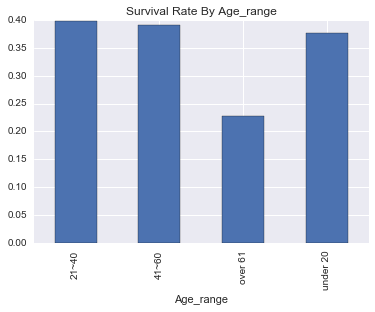

In [25]:
survival_rate(titanic_with_age_range, "Age_range", "Survived")

Now it is look like that over 60s years old passenger's survival rate is very low, cmpared to younger ones, and it the highest ruvival rate was 40% with age range from 21 to 40, which are reasonable that youger ones hos more energy to survive but youger than 20 maynot also.

<b>SibSp and Survival Rate

Survival Rate by SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By SibSp')


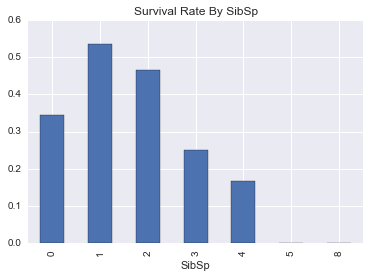

In [26]:
survival_rate(titanic_with_age_range, "SibSp", "Survived")

For number of siblings and spouse, it is interesting to see that passenger with 1 or 2 spouse are most likely to survived than 0 or 3+, maybe they help each other for their help.

<b> Parents/Chindren and Survival Rate

Survival Rate by Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By Parch')


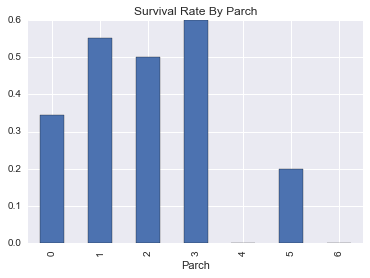

In [27]:
survival_rate(titanic_with_age_range, "Parch", "Survived")

For number of Parents and children, passenger with 3 parents or childrens are most likely to survivied.

<b>Fare and Survival Rate

Because Fare also has too many variations, I again created fare range variable for simplicity. 
And form previus histogram plot, I created 5 range for fares.

In [28]:
# creating fare raenge
def fare_range(fare):
    if fare>200:
        return "over 200"
    if fare>150:
        return "150~199"
    if fare>100:
        return "100~149"
    if fare>50:
        return "50~199"
    else:
        return "under 50"
    
titanic_with_fare = titanic
titanic_with_fare["Fare_range"] = titanic["Fare"].apply(fare_range)
titanic_with_fare[["Fare", "Fare_range"]].head()

,Fare,Fare_range
1,7.2500,under 50
2,71.2833,50~199
3,7.9250,under 50
4,53.1000,50~199
5,8.0500,under 50


Survival Rate by Fare_range
100~149     0.791667
150~199     0.666667
50~199      0.654206
over 200    0.700000
under 50    0.318741
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By Fare_range')


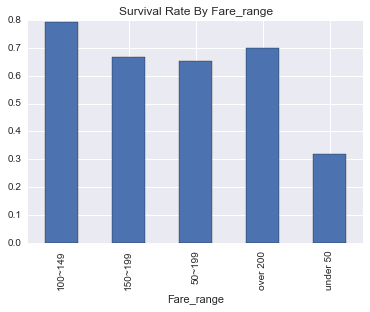

In [41]:
survival_rate(titanic_with_fare, "Fare_range", "Survived")

For the survival rate in terms of fare, it is no surprised that as lowest fare under 50 has lowest survival range. However, the highest range of survival rate is actually 100 to 149, and it is seems like because there are few samples for over 150 fare this might be happened.

Rember that I mentioned that there might be the correlation between, class and fare, better class is more expensive. Here I plot box plot of two variable, Class and Fare to investigate that assumpotion.

(0, 200)

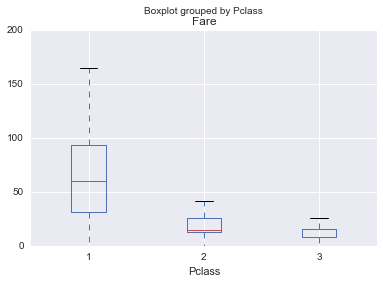

In [29]:
titanic.boxplot(column='Fare',by="Pclass").set_ylim(0, (200))

Here is is looks like that the better class(1) is more expensive than other class(2,3) and class to is slightly more expensive than class 3. This means that passnger paying expensive fare is most likely to be at better class automatically, and vice versa.

<b> Embarked and Survival

Survival Rate by Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Axes(0.125,0.125;0.775x0.775) Text(0.5,1,u'Survival Rate By Embarked')


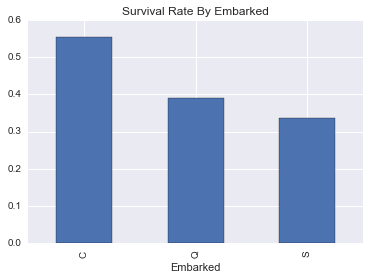

In [30]:
survival_rate(titanic_with_fare, "Embarked", "Survived")

It is looks like that the passenger who come from C (Cherbourg), has the highest surviva rate and from Southampton has lowest survival rate.

I thought that there are any relationship between place they embarked and class hey stay. So I created below to see that question.

In [31]:
titanic.pivot_table(index=['Embarked','Pclass'], aggfunc='count')[["PassengerId"]]

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

Just by looking at this pivot table, it does not really seems have any relationship between classes and embarked place.

# In Summary

From privious Bivariate Analysis, it is seems like that the passengers with following factors are most like to survived in this accidents.

1. Female
2. Class 1
3. Age Between 21 ~ 40
4. Has 1 Siblings or Spouse
5. Has 3 Parents or Childrens
6. Embarked At Cherbourg

And from previous correlations and biviate analysis, it is looks like that Class and Gender plays huge role wheather they will survive or not.

In [32]:
print "Survival Rate by Sex and Class"
titanic.pivot_table(index=['Sex','Pclass'], aggfunc='mean')[["Survived"]]

Survival Rate by Sex and Class


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Above table shows the survival rate (mena of Survived) in each Sex and Pclass.

It is very obvious that the almost 97% of female at Pclass are survived and almost 13% of male at class 3 are survived

# Interpretation

I could this of that easily that better class (with more fare) might be located at higher part of Titanic so that they might have more time to escape while the ship is shinking.

And also, I can assume that the sea water might be very cold and female tends to have higher body temperature than male could save their lives while they are floating on the cold sea water.

Other factor, like age, it is easy to guess that passenger at 20^40 has more energy to survived than old or childrens. and also people with more sibling/spouse/parents/childrens can help each other so that tend to survive more then others.

In short, young rich female passenger with more families are the one who survived in Titanic accidents.